### Motivation.

For our Final Project in the course Social Data Analysis at DTU we decided to analyse the data-set of all taxi trips in 2015 in New York City. 
Our initial study is centred on Taxi trends throughout the year and the day, but we will utilise the information obtained to make a comparison with new transport providers like Uber and to visually see the impact of the recent Covid-Pandemic on life in big cities. 
We believe this data-set provides endless opportunities and that we have only scratched the surface with our studies. However some our visualisations show how fascinating the data-set is and how with data we comprehend the world’s dynamics. 


Our Analysis is guided by a Consistent Visual Platform which we use to direct the path of interest of the User, providing multiple articles as well as summaries and annotations. 
We also decided to realise many of our graphs in bokeh form in order to deliver a more stimulating experience for the whomever is interested in visualising our work, even if it is not their area of expertise. 



### Basic stats.

The data is structured in a total of 17 columns containing information about single taxi trips in NYC. 

- vendorid: A code indicating the TPEP provider that provided the record.

  1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
  
  
- tpep_pickup_datetime: The date and time when the meter was engaged. 

- tpep_dropoff_datetime: The date and time when the meter was disengaged. 

- passenger_count: The number of passengers in the vehicle. This is a driver-entered value.

- trip_distance: The elapsed trip distance in miles reported by the taximeter

- pulocationid: TLC Taxi Zone in which the taximeter was engaged

- dolocationid: TLC Taxi Zone in which the taximeter was disengaged

- ratecodeid: The final rate code in effect at the end of the trip.

    1= Standard rate, 
    2= JFK, 
    3= Newark, 
    4= Nassau or Westchester, 
    5= Negotiated fare, 
    6= Group ride
    
- store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle
    memory before sending to the vendor, aka “store and forward,”
    because the vehicle did not have a connection to the server.

    Y= store and forward trip, 
    N= not a store and forward trip
    
- payment_type: A numeric code signifying how the passenger paid for the trip.

    1= Credit card, 
    2= Cash, 
    3= No charge, 
    4= Dispute, 
    5= Unknown, 
    6= Voided trip
- fare_amount: The time-and-distance fare calculated by the meter.

- extra: Miscellaneous extras and surcharges. Currently, this only includes the 0.50 dollars and 1 dollar rush hour and overnight charges.

- mta_tax: 0.50 dollars MTA tax that is automatically triggered based on the metered
    rate in use.
  
- improvement_surcharge: 0.30 dollars improvement surcharge assessed trips at the flag drop. The
    improvement surcharge began being levied in 2015.

- tip_amount: This field is automatically populated for credit card
    tips. Cash tips are not included.
    
- tolls_amount: Total amount of all tolls paid in trip. 

- total_amount: The total amount charged to passengers. Does not include cash tips.  


### The code

For the next part it will be describe part by part with the same chronology that it was used in the webpage. Since, is how we started the notebook and is a more natural way to follow it. So that, the reviewer can see how we started to add more and more analysis after findings in the previous parts or solving different problems.

Firstly, the needed libraries are imported

In [53]:
import pandas as pd
import numpy as np
import datetime
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.ticker import PercentFormatter
import random
import os
import folium 
from folium.plugins import *

sns.set(color_codes=True)
%matplotlib inline

The data is imported.

In [3]:
'''#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="****************",
                 password="****************,
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("f9tw-8p66", limit=171000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi_2009 = pd.DataFrame.from_records(results)'''

'#!/usr/bin/env python\n\n# Unauthenticated client only works with public data sets. Note \'None\'\n# in place of application token, and no username or password:\nclient = Socrata("data.cityofnewyork.us", None)\n\n# Example authenticated client (needed for non-public datasets):\nclient = Socrata("data.cityofnewyork.us",\n                 "Hi16i3SK4y2UNiONqpKz4IROh",\n                 username="mtcarlos98@gmail.com",\n                 password="Azeroth98",\n                 timeout=120)\n#https://data.cityofnewyork.us/resource/gkne-dk5s.json\n# First 2000 results, returned as JSON from API / converted to Python list of\n# dictionaries by sodapy.\nresults = client.get("f9tw-8p66", limit=171000) #Uber rows without NaN\n\n# Convert to pandas DataFrame\ndf_taxi_2009 = pd.DataFrame.from_records(results)'

In [14]:
'''#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="****************",
                 password="****************,
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("uwyp-dntv", limit=173000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi_2011 = pd.DataFrame.from_records(results)'''

In [15]:
'''#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="****************",
                 password="****************,
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("kerk-3eby", limit=176000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi_2012 = pd.DataFrame.from_records(results)'''

In [16]:
'''#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="****************",
                 password="****************,
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("t7ny-aygi", limit=173000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi_2013 = pd.DataFrame.from_records(results)'''

In [3]:
#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="***************",
                 password="***************",
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("gkne-dk5s", limit=165000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi= pd.DataFrame.from_records(results)


In [18]:
'''#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="****************",
                 password="****************,
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("2yzn-sicd", limit=146000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi_2015 = pd.DataFrame.from_records(results)'''

In [19]:
'''#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="****************",
                 password="****************,
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("uacg-pexx", limit=131000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi_2016 = pd.DataFrame.from_records(results)'''

In [190]:
'''#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="****************",
                 password="****************,
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("biws-g3hs", limit=11000000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi_2017 = pd.DataFrame.from_records(results)'''

In [21]:
'''#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="****************",
                 password="****************,
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("t29m-gskq", limit=112000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi_2018 = pd.DataFrame.from_records(results)'''

In [22]:
'''#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="****************",
                 password="****************,
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("2upf-qytp", limit=84000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi_2019 = pd.DataFrame.from_records(results)'''

In [23]:
'''#!/usr/bin/env python

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                 "Hi16i3SK4y2UNiONqpKz4IROh",
                 username="****************",
                 password="****************,
                 timeout=120)
#https://data.cityofnewyork.us/resource/gkne-dk5s.json
# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("kxp8-n2sj", limit=24000) #Uber rows without NaN

# Convert to pandas DataFrame
df_taxi_2020 = pd.DataFrame.from_records(results)'''

It was merged the different datasets.

In [159]:
'''df_taxi=(df_taxi_2020
         .append(df_taxi_2019)
         .append(df_taxi_2018)
         .append(df_taxi_2017)
         .append(df_taxi_2016))
df_taxi.rename(columns = {'pulocationid': 'pickup_location',
                          'dolocationid': 'dropoff_location'
                         }, inplace = True)

df_taxi_2011.rename(columns = {'dropoff_datetime': 'tpep_dropoff_datetime'}, inplace = True)

df_taxi_2014.rename(columns = {'pickup_datetime': 'tpep_pickup_datetime',
                               'dropoff_datetime': 'tpep_dropoff_datetime',
                               'imp_surcharge': 'improvement_surcharge',
                               'vendor_id': 'vendorid',
                               'rate_code' : 'ratecodeid',
                               }, inplace = True)
df_taxi_2015.rename(columns = {'pickup_datetime': 'tpep_pickup_datetime',
                               'dropoff_datetime': 'tpep_dropoff_datetime',
                               'imp_surcharge': 'improvement_surcharge',
                               'vendor_id': 'vendorid'
                              }, inplace = True)


df_taxi=(df_taxi        
         .append(df_taxi_2015)
         .append(df_taxi_2014)
         .append(df_taxi_2013)
         .append(df_taxi_2012)
         .append(df_taxi_2011)
         .append(df_taxi_2009))

df_taxi.rename(columns = {'tpep_dropoff_datetime': 'dropoff_datetime',
                          'tpep_pickup_datetime': 'pickup_datetime',
                         }, inplace = True)

'''

In order to check that all of the columns were alike we performed the following checking with each of the years. Changing the column names if it where needed. 

In [107]:
'''#difference
dif1=df_taxi.columns
dif2=df_taxi_2015.columns
print(np.setdiff1d(dif1,dif2))
print(np.setdiff1d(dif2,dif1))'''

['congestion_surcharge' 'dropoff_location' 'improvement_surcharge'
 'pickup_location' 'tpep_dropoff_datetime' 'tpep_pickup_datetime'
 'vendorid']
['dropoff_datetime' 'dropoff_latitude' 'dropoff_longitude' 'imp_surcharge'
 'pickup_datetime' 'pickup_latitude' 'pickup_longitude' 'vendor_id']


After merging all the year, we notice that the socrata sample was highly unbalanced. (there was even months that didn't appear.  

In order to solve that a bigger sample ( in the order of several GB) were needed. So we decided continue only with year 2014, which the samples were always balance in contrast with the other years. For year distributions it was done a list with the number of rows present in each of the full datasets.

### Data Engineering

In order to work with the dataset several changes have to be made. Some of those changes are done in the analysis but here we can find most of them.

Firstly, it is needed to change the datetime format to datetime so it can be extracted time features.

In [4]:
# CHANGE DATE TIME TO DATETIME

df_taxi['pickup_datetime'] = pd.to_datetime(df_taxi['pickup_datetime'],format = '%Y-%m-%dT%H:%M')
df_taxi['dropoff_datetime'] = pd.to_datetime(df_taxi['dropoff_datetime'],format = '%Y-%m-%dT%H:%M')
df_taxi_all_columns = df_taxi

In [5]:
#split date/time column
df_taxi['pickup_datetime'] = pd.to_datetime(df_taxi['pickup_datetime'].copy())        
#df_taxi['Year'] = df_taxi['pickup_datetime'].dt.year
df_taxi['Month'] = df_taxi['pickup_datetime'].dt.month
df_taxi['MonthDay'] = df_taxi['pickup_datetime'].dt.day
df_taxi['DayOfWeek'] = df_taxi['pickup_datetime'].dt.dayofweek
df_taxi['HourOfDay'] = df_taxi['pickup_datetime'].dt.hour
df_taxi["HourOfWeek"] = (df_taxi["DayOfWeek"]*24 )+df_taxi["HourOfDay"].astype(float)



The Lattitude and longitud is formated from strings to float

In [43]:
# CHANGE LONGITUTE AND LATITUDE TO FLOAT
#df_taxi=df_taxi.iloc[:,[1,0,2,3,4,5,6]]
df_taxi.rename(columns={"pickup_latitude": "Lat", "pickup_longitude": "Lon"},inplace=True)
df_taxi['Lon']=df_taxi['Lon'].apply(lambda x: float(x))
df_taxi['Lat']=df_taxi['Lat'].apply(lambda x: float(x))
df_taxi['dropoff_longitude']=df_taxi['dropoff_longitude'].apply(lambda x: float(x))
df_taxi['dropoff_latitude']=df_taxi['dropoff_latitude'].apply(lambda x: float(x))
df_taxi['trip_distance']=df_taxi['trip_distance'].apply(lambda x: float(x))

### Analysis

the first analysis that we wanted to perform is regarding time distributions. In order to do that we show different distributions in the form of histograms mainly. Therefore, for using the same format we created a plot function. We used Histrograms over other figures, since they are clear way to show grouped distributions. Additionally, in this case most of the histogram are counts, giving a natural feeling of value sumed in piles.

In [84]:
# PLOTTING BY HOUR OF THE DAY
def Grouped_plot(x_taxi,Index_list,label_plot,version):
    
    if version == 1:
        # set width of bars
        barWidth = 0.8

        # set heights of bars
        bars1 = list(x_taxi)

        # Make the plot

        plt.figure(figsize = [12, 6])

        plt.bar(range(1, len(bars1)+1),height = bars1, width=barWidth,
                label='Taxi', alpha=0.5, align = 'center',color='yellow',edgecolor = "black")

        plt.xlabel(label_plot)
        plt.ylabel('Number of Pick Ups  ')
        title_plot=label_plot+' PickUps distribution'
        plt.title(title_plot)

        # Add xticks on the middle of the group bars
        plt.xlabel(label_plot, fontweight='bold')
        plt.xticks([r + barWidth for r in range(len(bars1))], Index_list)
        
    else:
        # set heights of bars
        bars1 = list(x_taxi)      
        
        # Set position of bar on X axis
        r1 = np.arange(len(bars1))


        #plot
        plt.figure(figsize = [12, 6])
        title_plot=label_plot+' PickUps distribution'
        plt.title(title_plot)
        ax = plt.bar(r1, x_taxi,  label='Taxi', alpha=0.5);

        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

        # Create legend & Show graphic
        plt.legend()
        plt.show()


In [85]:
df_dayhour_taxi = df_taxi.groupby("HourOfDay")["HourOfDay"].count()
df_dayhour_taxi= pd.DataFrame(df_dayhour_taxi/df_dayhour_taxi.sum())

df_dayhour = pd.DataFrame({'Taxi':  df_dayhour_taxi['HourOfDay'].to_list()})

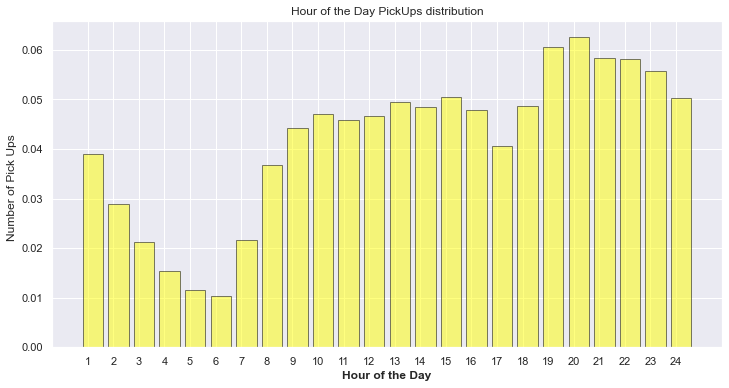

In [86]:
Grouped_plot(df_dayhour['Taxi'].values,
             range(1, len(list(df_dayhour['Taxi'].values))+1),'Hour of the Day',1)




In [11]:
# PICK UPS BY WEEK DAY
df_weekday_taxi = df_taxi.groupby("DayOfWeek")["DayOfWeek"].count()
df_weekday_taxi=pd.DataFrame(df_weekday_taxi/df_weekday_taxi.sum())

df_weekday = pd.DataFrame({'Taxi':  df_weekday_taxi['DayOfWeek'].to_list()},
                       index=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                              'Friday', 'Saturday', 'Sunday' ])

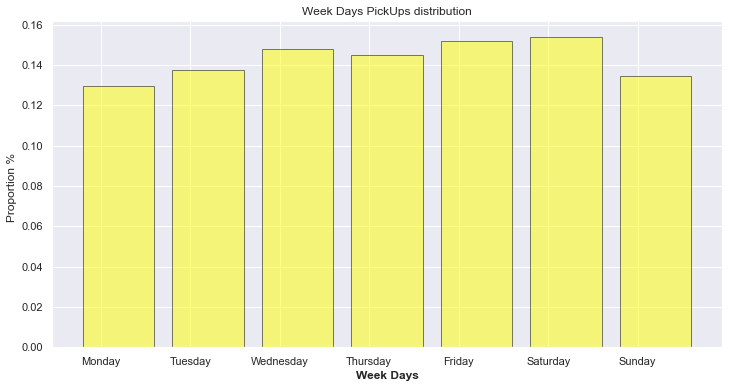

In [12]:

Grouped_plot(df_weekday['Taxi'].values,
             df_weekday.index.to_list(),'Week Days',1)



In [13]:
# MONTHLY
df_month_taxi = df_taxi.groupby("Month")["Month"].count()
df_month_taxi=pd.DataFrame(df_month_taxi/df_month_taxi.sum())

df_month = pd.DataFrame({'Taxi':  df_month_taxi['Month'].to_list()},
                       index=[ 'January', 'February', 'March', 'April', 'May', 'June', 'July',
                              'August', 'September', 'October', 'November', 'December'])






As stated before the following list ares the different years of which we had the datasets and the number of rows that them contained.

In [72]:
lista1=['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
lista2=[171,168,170,176,173,165,146,131,113,112,84,24.6]

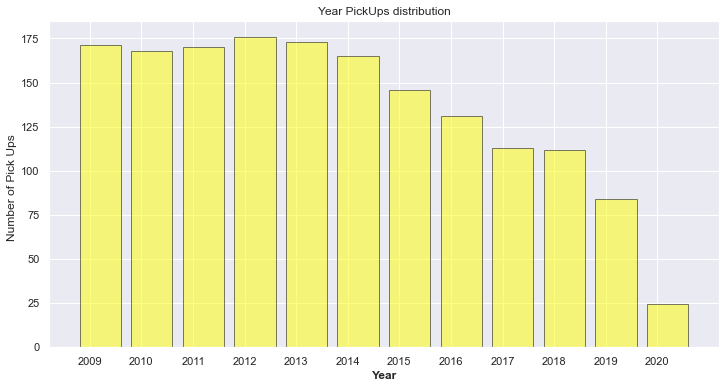

In [75]:
Grouped_plot(lista2,
             lista1,'Year',1)

As we will see in continuation, for hourly group of an entier week this plot is not as clean as in the previous one. Therefore, we found other way to show these distributions which is shown later, on this notebook.

In [15]:
# Weekhour 
df_weekhour_taxi = df_taxi.groupby("HourOfWeek")["HourOfWeek"].count()
df_weekhour_taxi=pd.DataFrame(df_weekhour_taxi/df_weekhour_taxi.sum())

df_weekhour = pd.DataFrame({'Taxi':  df_weekhour_taxi['HourOfWeek'].to_list()})



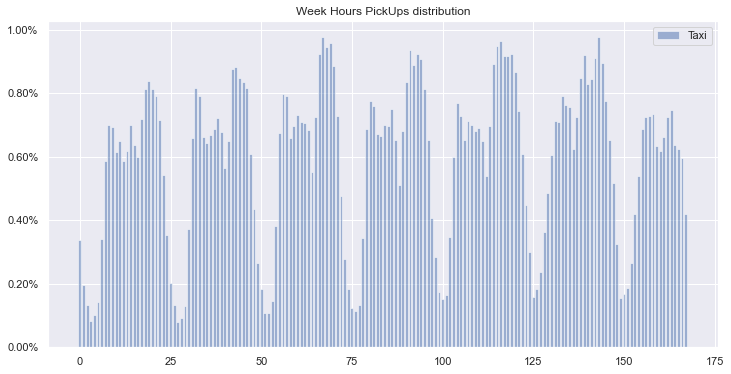

In [17]:
Grouped_plot(df_weekhour['Taxi'].values,
           range(0, len(list(df_weekhour['Taxi'].values)), 24),'Week Hours',2)




One interesting analysis was to visualize how in peaks hours the average speed is reduced due to the congestion of the city, this is shown in the following figures, for which was needed to create a new variable "average_speed"

In [7]:
def triptimeinhours(pickup_time, dropoff_time):
        
    return (dropoff_time - pickup_time).total_seconds()/3600 

df_taxi['trip_hours'] = df_taxi.apply(lambda x: triptimeinhours(x['pickup_datetime'],x['dropoff_datetime']), axis=1)
df_taxi['average_speed'] = df_taxi['trip_distance'].astype(float).divide(df_taxi['trip_hours'])
df_taxi.replace([np.inf, -np.inf], np.nan, inplace=True)



In [61]:
df_avg = df_taxi.groupby("HourOfDay")["average_speed"].mean()
df_avg= pd.DataFrame(df_avg/df_avg.sum())

df_avg_spd = pd.DataFrame({'Taxi':  df_avg['average_speed'].to_list()})

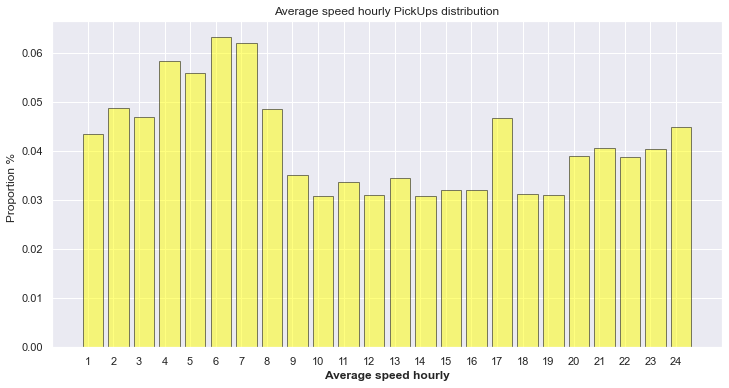

In [64]:
Grouped_plot(df_avg_spd['Taxi'].values,
           range(1, len(list(df_avg_spd['Taxi'].values))+1),'Average speed hourly',1)


After looking how change the average speed which was clear the factors that influence this, we wanted to explore what was the different factors that influence the duration of a trip. In order to that, a visual and direct way of visualize this influence was with a correlation matrix heatmap.

<AxesSubplot:>

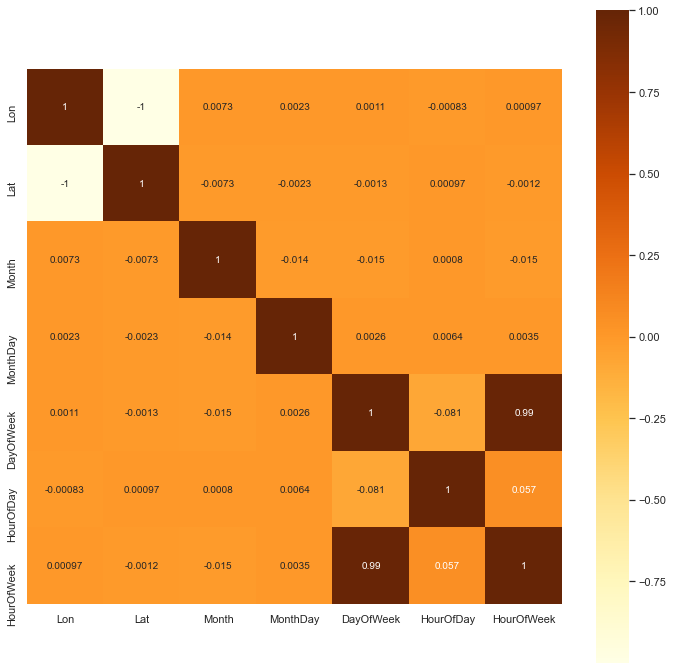

In [87]:
corr = df_taxi.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='YlOrBr')

The following figure were not included in the website since they were chaotic, but they were meant to show the different trip duration for  each of the influencer features

Text(0, 0.5, 'trip duration')

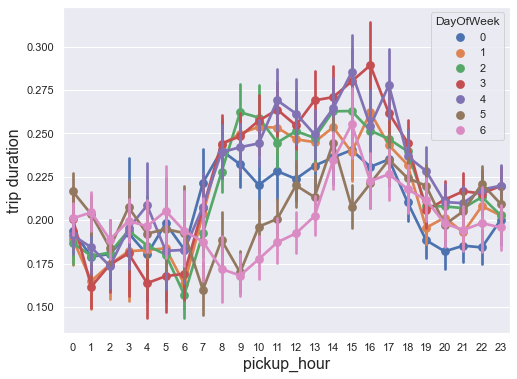

In [99]:
import calendar
plt.figure(figsize=(8,6))
sns.pointplot(x='HourOfDay',y='trip_hours',data=df_taxi.dropna()
              ,hue='DayOfWeek')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('trip duration',fontsize=16)

Text(0, 0.5, 'trip duration')

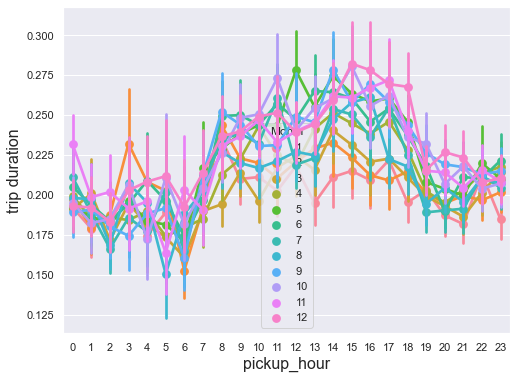

In [101]:
plt.figure(figsize=(8,6))
sns.pointplot(x='HourOfDay',y='trip_hours',data=df_taxi.dropna()
              ,hue='Month')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('trip duration',fontsize=16)

From the covariance matrix and after some transformations of the features performed at the data engeneering part, we choose the following features for prediction.

In [45]:

Dataset=df_taxi[['HourOfDay','Month',
                     'dropoff_longitude','dropoff_latitude',
                 'Lon','Lat','trip_distance']].dropna()

X=Dataset[['HourOfDay','Month',
                     'dropoff_longitude','dropoff_latitude',
                 'Lon','Lat']].to_numpy()
y=Dataset['trip_distance'].to_numpy()


In order to do predictions of the time it takes to a taxi to arrive the destination given the previous parameters, we use random_forest algorithm. Which is easy to implement and is difficult to overfit. However, the results are not straight forward. This problem was competition in kaggle in 2017 with a price of 30000$. The results were better than expected

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

<AxesSubplot:>

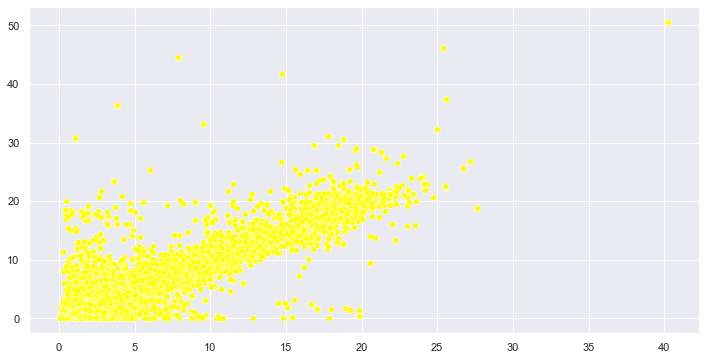

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_hat=regr.predict(X_test)
plt.figure(figsize = [12, 6])
sns.scatterplot(x=y_hat, y=y_test,
                color='yellow', edgecolors='black')
plt.xlabel('Prediction', fontweight='bold')
plt.ylabel('Real value', fontweight='bold')
plt.title('Prediction vs Real value of trip distance')

In the following analysis we create an interactive plot for solve the problem with the hourly week distributions. In order to do that we used the library bokeh. At the beggining we used histograms again for each day. However, even with the optimal alpha parameter, the plot became chaotic when 3 or more days were shown.


In [105]:
from bokeh.plotting import figure
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, output_file, show
from bokeh.transform import linear_cmap
from bokeh.models import ColumnDataSource, FactorRange, Legend



In [ ]:
#output_notebook() # open the bokeh viz on the notebook.
## it is a standard way to convert your df to bokeh
source_taxi = ColumnDataSource(df_grouped_taxi)

In [ ]:
p_taxi = figure(x_range=FactorRange(factors=list(map(str, (df_grouped_taxi.index+1).values.tolist()))), 
           plot_height=400, plot_width=800, title='Hourly Week Days Distribution Taxi',
           x_axis_label='Hour of the Day', y_axis_label='Proportioned Frequency')

In [ ]:
color = palettes.Category20[len(weekday_list)]
bar ={} # to store vbars
items = []
### here we will do a for loop:
for indx,i in enumerate(weekday_list):
    bar[i] = p_taxi.line(x='Hours', 
                    y=i, 
                    source=source_taxi, 
                    width=0.9,
                    muted=True, 
                    muted_alpha=0.005,
                    color=color[indx])
    items.append((i, [bar[i]]))
    
legend = Legend(items=items)
p_taxi.add_layout(legend, 'left')
p_taxi.legend.click_policy = 'mute'
p_taxi.legend.label_text_font_size='7pt'
show(p_taxi)

Bokeh gave some problem at the moment of uploading it to the website. But after researching, we manage to do it in the following way.


In [ ]:
output_file('plot_taxi.html', mode='inline')
save(p_taxi)
html = file_html(p_taxi, CDN, "my plot")
with open("./plot_taxi.html","w+") as f:
    f.write(html)

In order to visualize and analyse the geographical data, it was used several methods. The first one was a folium heatmap, However, this plot was not used for the website since, a better figure was achieve later.

In [28]:
"""Generate folium San Francisco base map with Stamen toner tile """
def generateBaseMap(default_location=[40.767937,-73.982155], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, 
                          zoom_start=default_zoom_start, tiles="Stamen toner")
    return base_map

In [29]:
"""Creates array of coordinates to input folium map marker map"""
def to_coordinates(row):
    return [row["Lat"],row["Lon"]]

In [30]:
df_taxi['Coor']=df_taxi.apply(to_coordinates,axis=1)
data_HM_taxi=df_taxi[['Lat', 'Lon', 'Coor']].groupby(['Lat', 'Lon']).count().reset_index().values.tolist()

In [33]:
base_map_taxi = generateBaseMap()

HeatMap(data=df_taxi['Coor'], 
        radius=10, max_zoom=12).add_to(base_map_taxi)
base_map_taxi

The next method for visualize the geodata was a scatter heatmap of the coordinates. This was the selected method for show the coordinates of pickups and dropoff. However, this process was done on plotly and using DTU HPC due to the computation of this process.

 In order to plot directly the longitud and latitude data, it was needed to convert this distance regarding the curvature of the globe, in order to conver the distance we create the harvesine function.

In [36]:
#euclidian distances introduce errors. Therefore, we bin with haversine functions.
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

Then we filter for the area of interest, and also for eliminate wrong data.

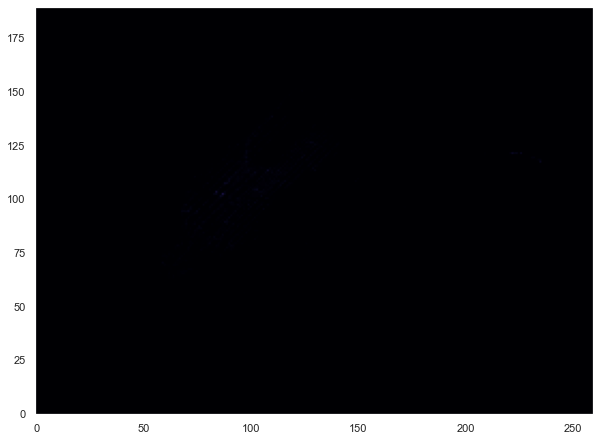

In [38]:
# remove wrong data.
#plt.hist(df['X'], bins='auto')
#plt.hist(df['Y'], bins='auto')
indexNames = df_taxi[(df_taxi['Lon'] < -74.08) |(df_taxi['Lon'] > -73.84) | (df_taxi['Lat'] > 40.86)| (df_taxi['Lat'] < 40.60)].index
df_taxi_drop=df_taxi.drop(indexNames)
#plt.hist(df['X'], bins='auto')
#plt.hist(df['Y'], bins='auto')
#bin estimation

yharvesine=(10/2)*(haversine(lon_min, lat_min, lon_min, lat_max)+haversine(lon_max, lat_min, lon_max, lat_max))
xharvesine=(10/2)*(haversine(lon_min, lat_max, lon_max, lat_max)+haversine(lon_min, lat_min, lon_max, lat_min))

count, lon, lat = np.histogram2d(df_taxi_drop.Lat, df_taxi_drop.Lon, bins = [int(xharvesine),int(yharvesine)])

#coordinates = df[['Lon', 'Lat']]

plt.figure(figsize=(10,10))
ax= plt.imshow(count, cmap='magma',vmax=(500/(df_taxi_drop.shape[0]/df_taxi_drop.shape[0])), origin='lower') 
#vmax 500/4 - 4 times less observations after dropping

plt.grid(b=None)

The next piece of code is not used as an analysis and more like a wrap. We use a Heatmap in folium with time to show all the analysis that we have made previously in real time so the reader can get a more real experience of what is happening regarding what it was say in the previous analysis.

In [39]:
prep_data_taxi = df_taxi[['Lat', 'Lon','HourOfWeek']]
prep_data_taxi = prep_data_taxi.dropna(axis=0, subset=['Lat', 'Lon','HourOfWeek'])
taxi_timeline = [[[row['Lat'],row['Lon']] for index, row in prep_data_taxi[prep_data_taxi['HourOfWeek'] == i].iterrows()] for i in range(0,166)]

In [40]:
base_map = folium.Map([40.767937,-73.982155], tiles='Stamen Toner', zoom_start=10)
HeatMapWithTime(taxi_timeline, auto_play=True,
                             radius=6).add_to(base_map)
display(base_map)

Since, the heatmap with time was impossible to upload to the website due it's weight, it was created a gif using selenium to save each photogram.

In [ ]:
import pandas as pd
import numpy as np
import time 

import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

import os
import time
from selenium import webdriver
from PIL import Image 
import glob

In [ ]:
# Function to visualize map
def embed_map(map, filename):
    map.save(filename)
    return IFrame(filename, width='100%', height='600px')

In [ ]:
dow_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [ ]:
for i in range(df_taxi.DayOfWeek.min(), df_taxi.DayOfWeek.max()+1):
    for j in range(df_taxi.HourOfDay.min(), df_taxi.HourOfDay.max()+1):    
        
        # Filter to include only data for each day of week and hour of day
        df_geo = df_taxi.loc[(df_taxi.DayOfWeek==i) & (df_taxi.HourOfDay==j)][['Lat', 'Lon']].copy()

        # Instantiate map object 
        map_5 = folium.Map(location=[40.75, -73.96], tiles='Stamen Toner', zoom_start=9)

        # Plot heatmap
        HeatMap(data=df_geo, radius=10).add_to(map_5)

        # Get day of week string from dow_dict
        d = dow_dict.get(i)
        
        # Add title to heatmap
        title_html = f'''<h3 align="center" style="font-size:20px">
                        <b>Taxi Pickups at {j}:00 on {d}: {len(df_geo)} rides</b></h3>
                     '''
        map_5.get_root().html.add_child(folium.Element(title_html))

        #Save map
        embed_map(map_5, f'./maps_png_pickup/{i}_{j}_heatmap.html')